# Code alongs - MLP - Multilayered perceptron

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.datasets.mnist import load_data

# from tensorflows documentation 
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [6]:
x_train.shape

(60000, 28, 28)

7

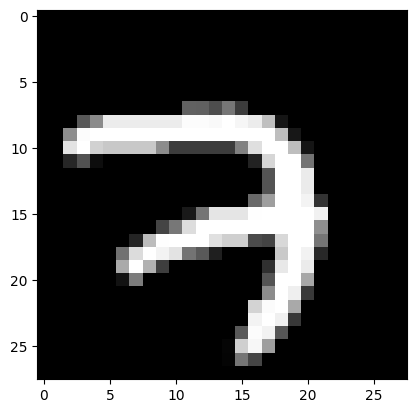

In [21]:
plt.imshow(x_train[5000], cmap="gray")
y_train[5000]

In [19]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [20]:
x_train[5000].shape

(28, 28)

In [16]:
# pixel intensity between 0 and 254 for this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [18]:
# pixel value at row 10, col 5 for image 5000
x_train[5000,10,5]

199

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

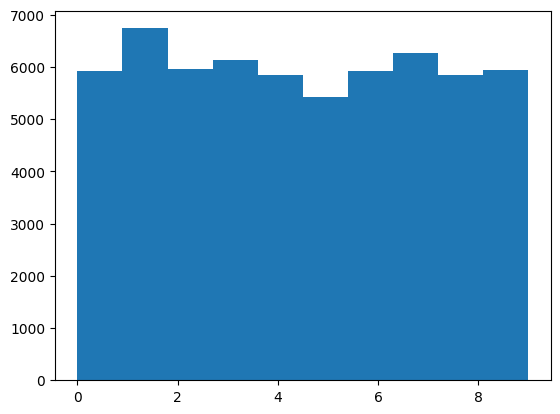

In [26]:
plt.hist(y_train)

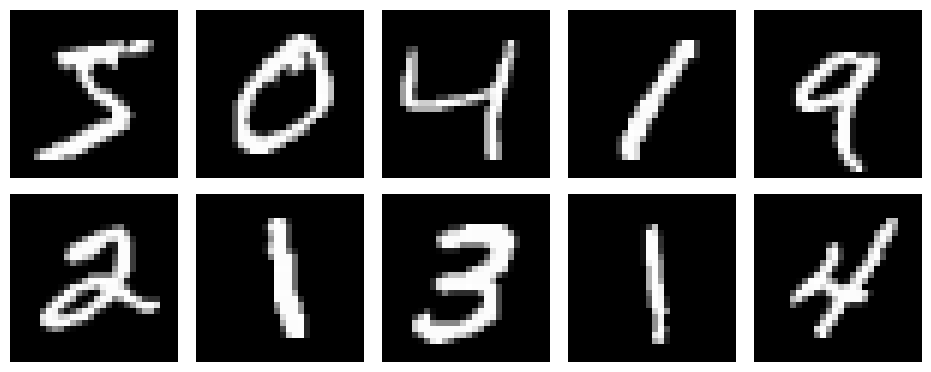

In [32]:
def display_images(data, n_rows = 2, n_cols = 5, figsize=(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)

display_images(x_train)

(10, 28, 28)

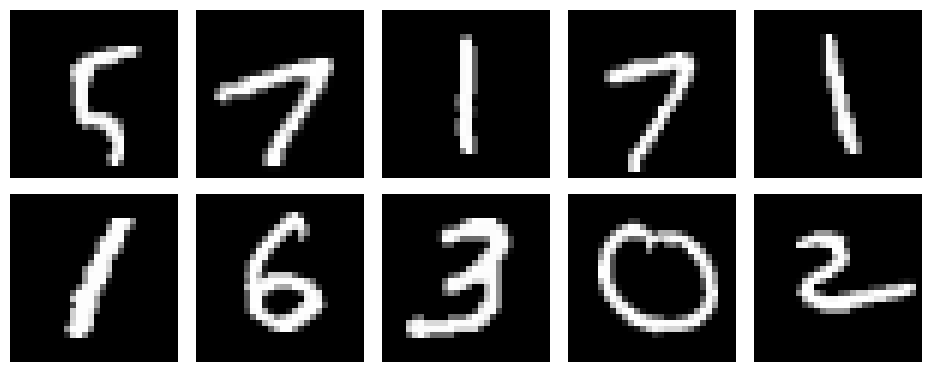

In [35]:
display_images(x_train[100:110])
x_train[100:110].shape

## Normalize data

In [38]:
X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255

X_train.min(), X_train.max()

(0.0, 1.0)

In [41]:
X_train[5000].reshape(-1).shape

(784,)

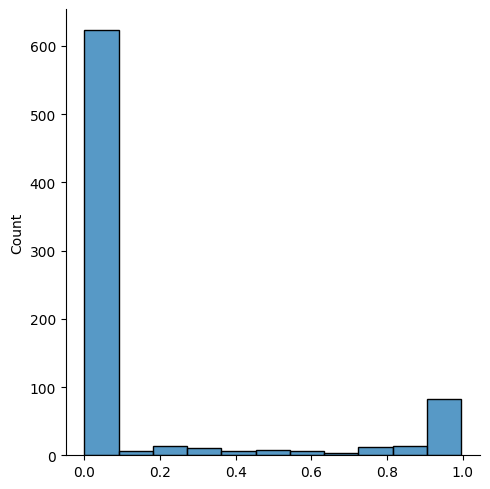

In [39]:
import seaborn as sns 

sns.displot(data = X_train[5000].reshape(-1), kind="hist")

## MLP model

- 10 output neurons/nodes (which represents 0,1,2,3,...,9, our classes)
- softmax activation function in output layer -> probabilities
- 784 neurons for input layer (28x28) -> use Flatten layer
- hidden layers -> Dense


In [49]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


def mlp_model(
    neurons: tuple | list = None,
    names: tuple | list = None,
    activations: tuple | list = [],
):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28, 28), name="Input_layer"))

    # hidden layers + output
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return model

# naive because we don't have any hidden layers
model_naive = mlp_model(neurons=[10], names=["Output_layer"], activations=["softmax"])
model_naive.summary()

/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_naive.fit(X_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.9325 - loss: 0.2445 - val_accuracy: 0.9307 - val_loss: 0.2562
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.9324 - loss: 0.2393 - val_accuracy: 0.9323 - val_loss: 0.2556
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.9341 - loss: 0.2361 - val_accuracy: 0.9313 - val_loss: 0.2543
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.9357 - loss: 0.2347 - val_accuracy: 0.9307 - val_loss: 0.2570
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.9324 - loss: 0.2393 - val_accuracy: 0.9320 - val_loss: 0.2593
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.9337 - loss: 0.2393 - val_accuracy: 0.9292 - val_loss: 0.2602
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.9356 - loss: 0.2326 - val_accuracy: 0.9305 - val_loss: 0.2579
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.9339 -

In [53]:
import pandas as pd 

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.93318,0.241361,0.9307,0.256233
1,0.93272,0.240429,0.9323,0.255587
2,0.93318,0.239823,0.9313,0.254283
3,0.93382,0.239015,0.9307,0.256997
4,0.93384,0.238646,0.9320,0.259279


In [54]:
model_naive.history.history

{'accuracy': [0.9331799745559692,
  0.9327200055122375,
  0.9331799745559692,
  0.9338200092315674,
  0.9338399767875671,
  0.9337400197982788,
  0.9347000122070312,
  0.9341999888420105,
  0.9341199994087219,
  0.9342799782752991,
  0.9345200061798096,
  0.9351199865341187,
  0.9346399903297424,
  0.9353399872779846,
  0.934660017490387,
  0.9352999925613403,
  0.9358999729156494,
  0.9347599744796753,
  0.9347599744796753,
  0.9359599947929382],
 'loss': [0.24136076867580414,
  0.24042852222919464,
  0.23982292413711548,
  0.23901541531085968,
  0.238646000623703,
  0.23803366720676422,
  0.23707877099514008,
  0.23646903038024902,
  0.23648615181446075,
  0.2358034998178482,
  0.23531410098075867,
  0.23438619077205658,
  0.23450586199760437,
  0.23364083468914032,
  0.23350584506988525,
  0.23312920331954956,
  0.23240168392658234,
  0.23237967491149902,
  0.231917142868042,
  0.23184113204479218],
 'val_accuracy': [0.9307000041007996,
  0.9322999715805054,
  0.9312999844551086,
  